# Recognize Numbers from 0 to 5 in sign language
# Using Keras library and Tensorflow as backend

# loading training data

In [1]:
import h5py

In [2]:
file = 'train_signs.h5'
f = h5py.File(file,'r')

In [3]:
list(f.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [4]:
import numpy as np
X = np.array(list(f['train_set_x']))
Y = np.array(list(f['train_set_y']))

# Visualizing some of the training images

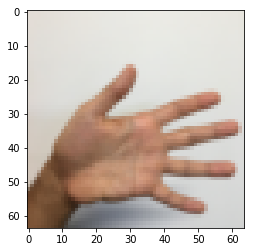

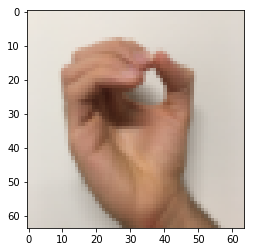

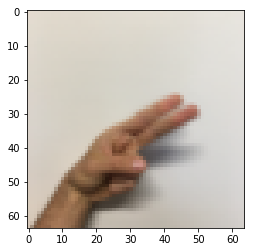

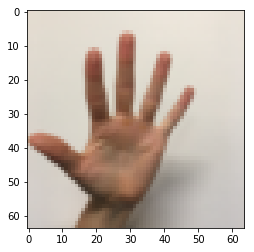

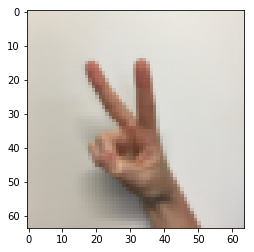

In [6]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(X[i])
    plt.show()

# Let's have a look at training examples from each class

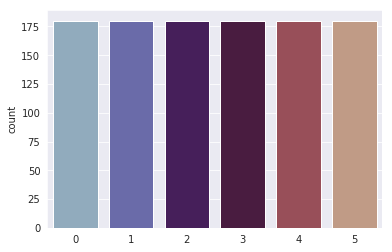

In [7]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(Y,palette='twilight')
plt.show()

## Ohhh.. each class is equally distributed i.e., we are having same number of 
## training examples for each class

## Shape of training features

In [8]:
X.shape

(1080, 64, 64, 3)

## Shape of Training Labels

In [9]:
Y.shape

(1080,)

## Converting training labels in to categories

In [10]:
import pandas as pd
Y = pd.get_dummies(Y)

In [11]:
Y.shape

(1080, 6)

# Splitting training data into training and validation sets

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size=0.1)
print('Shape of train set feature',X_train.shape)
print('Shape of validation set feature',X_val.shape)
print('Shape of train set label',y_train.shape)
print('Shape of validation set label',y_val.shape)
ntrain = len(X_train)
nval = len(X_val)

Shape of train set feature (972, 64, 64, 3)
Shape of validation set feature (108, 64, 64, 3)
Shape of train set label (972, 6)
Shape of validation set label (108, 6)


# Importing libraries and framework for training

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import LeakyReLU

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(64,64,3),use_bias=False))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3),use_bias=False))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3),use_bias=False))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3,3),use_bias=False))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,use_bias=False))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.BatchNormalization())
model.add(layers.Dense(6,activation='softmax'))

# Checking model Summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        864       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization_v2 (Batc (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18432     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 29, 29, 64)        0

## Finally getting ready for training i.e., compiling our model 

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Not using data augmentation as it was giving too less validation accuracy 
## while overfitting to training set

In [17]:
'''train_datagen = ImageDataGenerator(1./255,
                                  rotation_range=60,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  vertical_flip=True,
                                  horizontal_flip=True)
val_datagen = ImageDataGenerator(1./255)'''

In [18]:
'''train_generator = train_datagen.flow(X_train,y_train,batch_size=16)
validation_generator = val_datagen.flow(X_val,y_val)'''

# Creating model check point 


## So that weights with high accuracy on validation set would be saved 

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## Fitting model on training set

In [18]:
weights_trained = model.fit(X_train,y_train,
                                     batch_size=ntrain//16,
                                     epochs=50,
                                     validation_data=(X_val,y_val),
                                     callbacks=callbacks_list
                                     
                           )

Train on 972 samples, validate on 108 samples
Epoch 1/50
960/972 [============================>.] - ETA: 0s - loss: 1.6019 - accuracy: 0.4260
Epoch 00001: val_accuracy improved from -inf to 0.19444, saving model to weights.best.hdf5
972/972 [==============================] - 9s 9ms/sample - loss: 1.5988 - accuracy: 0.4270 - val_loss: 10.7861 - val_accuracy: 0.1944
Epoch 2/50
960/972 [============================>.] - ETA: 0s - loss: 0.9260 - accuracy: 0.6615
Epoch 00002: val_accuracy did not improve from 0.19444
972/972 [==============================] - 8s 8ms/sample - loss: 0.9270 - accuracy: 0.6595 - val_loss: 19.4726 - val_accuracy: 0.1944
Epoch 3/50
960/972 [============================>.] - ETA: 0s - loss: 0.6867 - accuracy: 0.7490
Epoch 00003: val_accuracy did not improve from 0.19444
972/972 [==============================] - 8s 8ms/sample - loss: 0.6938 - accuracy: 0.7479 - val_loss: 19.8192 - val_accuracy: 0.1944
Epoch 4/50
960/972 [============================>.] - ETA: 0s -

# Visualizing training and validation accuracy

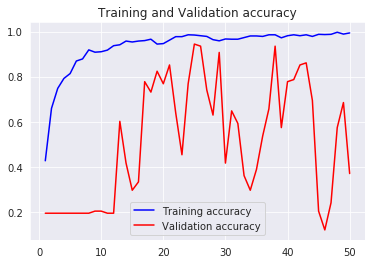

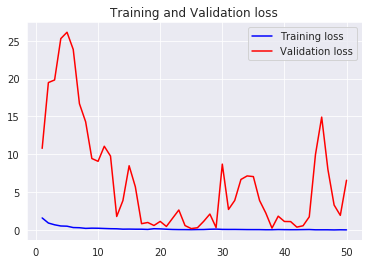

In [20]:
acc = weights_trained.history['accuracy']
val_acc = weights_trained.history['val_accuracy']
loss = weights_trained.history['loss']
val_loss = weights_trained.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

## Now we are going to see how to load weights with high accuracy which we saved 
## and check accuracy on test sets

## Creating same architecture of model and compiling

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(64,64,3),use_bias=False))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3),use_bias=False))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3),use_bias=False))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3,3),use_bias=False))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,use_bias=False))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.BatchNormalization())
model.add(layers.Dense(6,activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Loading Saved weights in same architecture of model

In [23]:
model.load_weights('weights.best.hdf5')

## Saving Model with weights and architecture

In [24]:
model.save('Best_model.h5')

## Loading Test File

In [25]:
test_file='test_signs.h5'
file = h5py.File(test_file,'r')

In [26]:
list(file.keys())

['list_classes', 'test_set_x', 'test_set_y']

In [27]:
test_X = np.array(list(file['test_set_x']))
test_y = np.array(list(file['test_set_y']))

In [28]:
test_X.shape

(120, 64, 64, 3)

In [29]:
test_y.shape

(120,)

In [30]:
test_y = pd.get_dummies(test_y)

# Evluating Model on Testing Data

In [31]:
model.evaluate(test_X,test_y)

120/120 [==============================] - 0s 3ms/sample - loss: 0.0792 - accuracy: 0.9750


[0.07918626461178065, 0.975]

# Hence on testing data we got 97.5% accuracy 

## Finally how to load saved models 
## Here we do not need to create whole model's architecture and compile for predictions 

### Because we have already saved our best model

In [32]:
from tensorflow.keras.models import load_model
model2 = load_model('Best_model.h5')

In [33]:
model.evaluate(test_X,test_y)

120/120 [==============================] - 0s 2ms/sample - loss: 0.0792 - accuracy: 0.9750


[0.07918626461178065, 0.975]